In [1]:
from trainer import *

/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=================[dataset is set to compas ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[run config is loaded]=================


In [2]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([1.3323], device='cuda:0')
epoch 0 -----------------------------------------
tensor([2.3315], device='cuda:0')
epoch 1 -----------------------------------------
tensor([0.6919], device='cuda:0')
epoch 2 -----------------------------------------
tensor([1.1602], device='cuda:0')
epoch 3 -----------------------------------------
tensor([1.1673], device='cuda:0')
epoch 4 -----------------------------------------
done


In [3]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([1.3323], device='cuda:0')
epoch 0 -----------------------------------------
tensor([2.3315], device='cuda:0')
epoch 1 -----------------------------------------
tensor([0.6919], device='cuda:0')
epoch 2 -----------------------------------------
tensor([1.1602], device='cuda:0')
epoch 3 -----------------------------------------
tensor([1.1673], device='cuda:0')
epoch 4 -----------------------------------------
done


In [4]:
extractor = get_feature_importance_extractor()
extractor.get()

tensor([ 0.3896, -0.3427,  0.6038, -1.2940,  0.5364, -0.1376,  0.4883,  1.2569,
        -0.5813, -0.6019, -0.3175], device='cuda:0', grad_fn=<DivBackward0>)

In [5]:
train_K_fold(get_run_config())

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[ 1 Fold ]=================
train_data: torch.Size([2979, 11])
train_label: torch.Size([2979])
validation_data: torch.Size([331, 11])
validation_label: torch.Size([331])
test_data: torch.Size([1656, 11])
test_label: torch.Size([1656])
-----------------------------------------


Epoch 1:  67%|██████▋   | 2/3 [00:00<00:00,  2.26it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 1: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s, loss=24.7, acc=0.511, AUC=0.513, val_acc=0.532, val_AUC=0.53]


tensor([ 0.2723, -0.2451,  0.4465, -0.9265,  0.3638, -0.1103,  0.3447,  0.9245,
        -0.4740, -0.4649, -0.2176], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 2: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s, loss=23, acc=0.541, AUC=0.561, val_acc=0.486, val_AUC=0.51]


tensor([-0.0254,  0.0013,  0.0283, -0.0026, -0.0354, -0.0818,  0.0077,  0.1120,
        -0.2270, -0.1219,  0.0698], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 3: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s, loss=22.9, acc=0.558, AUC=0.578, val_acc=0.574, val_AUC=0.604]


tensor([-0.0413, -0.0093,  0.0243, -0.0003, -0.0223, -0.1171,  0.0354,  0.1266,
        -0.2384, -0.1219,  0.0980], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 4: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s, loss=22.5, acc=0.571, AUC=0.599, val_acc=0.58, val_AUC=0.603]


tensor([-0.0458, -0.0471,  0.0222, -0.0272, -0.0382, -0.1095,  0.0349,  0.1509,
        -0.2541, -0.1304,  0.0911], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 5: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s, loss=22.5, acc=0.582, AUC=0.604, val_acc=0.589, val_AUC=0.592]


tensor([-0.0709, -0.0697,  0.0072, -0.0309, -0.0239, -0.1503,  0.0620,  0.1596,
        -0.2848, -0.1186,  0.1119], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 6:  67%|██████▋   | 2/3 [00:00<00:00,  2.24it/s]

tensor([-1.1544, -0.3577, -1.6423,  0.7825,  0.6846,  0.0096, -0.0957,  0.7773,
         0.8254, -0.6346,  0.8052])


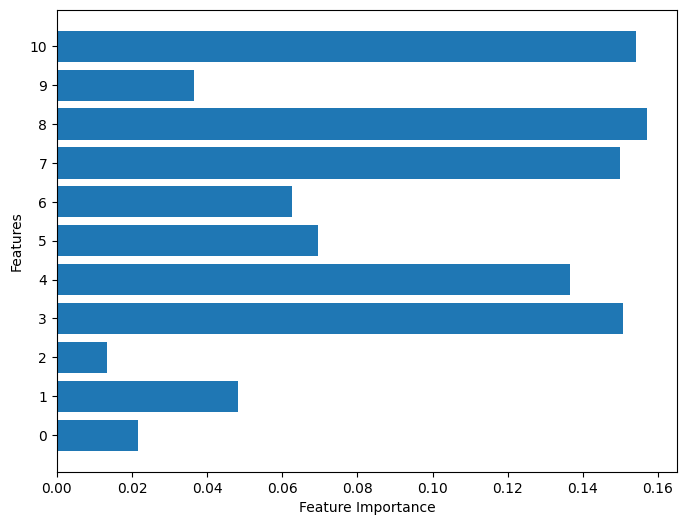

In [ ]:

importance = get_feature_importance_extractor().get().cpu()
print(importance)
importance = importance.softmax(dim=0).detach().numpy()
import matplotlib.pyplot as plt
# 可视化特征重要性
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()